In [112]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers, callbacks
import matplotlib.pyplot as plt

In [ ]:
# The train, val and test sets are present in this drive link
# Please download the files and upload them in the content folder first

# https://drive.google.com/drive/folders/12GqRiyFHPUauuY0IIMlycVPRv_DuG5FI?usp=sharing

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/train.txt', sep = ';', names = ['Text', 'Mood'])
print(df1.head())

df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/val.txt', sep = ';', names = ['Text', 'Mood'])
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/test.txt', sep = ';', names = ['Text', 'Mood'])

                                                Text     Mood
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [29]:
# Creating the vocabulary from the training set

def create_vocab(df):
  vocab = {}
  c = 1

  for i in df.iloc[:, 0]:
    j = i.split()
    for k in j:

      if k not in vocab.keys():
        vocab[k] = c
        c = c + 1

  # print(vocab)
  return vocab

In [88]:
# Creating the tokenized dataset

def use_vocab(df, vocab):
  text = []
  df = df.iloc[:, 0].tolist()

  length=0
  for i in df:
    if length < len(i.split()):
      length = len(i.split())
  print(length)

  for i in df:
    j = i.split()
    x = []
    y = 0

    for k in j:
      if k in vocab.keys():
        x.append(vocab[k])
        y = y+1

    y = length-y
    x.extend([0]*y)
    text.append(x)

  text = np.array(text)
  # print(text)
  return text

In [89]:
v = create_vocab(df1)
X_train = use_vocab(df1, v)
X_val = use_vocab(df2, v)
X_test = use_vocab(df3, v)

66
61
61


In [93]:
le = LabelEncoder()
y_train = le.fit_transform(df1.iloc[:, 1])

y_val = le.transform(df2.iloc[:, 1])
y_test = le.transform(df3.iloc[:, 1])

In [125]:
# Training the actual model

model = models.Sequential([
        layers.Embedding(len(v)+1, 40, mask_zero=True),
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(100),
        layers.Dense(6, activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
ES = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=30, validation_data=[X_val, y_val], callbacks=[ES])

Epoch 1/30
500/500 [==============================] - 102s 188ms/step - loss: 1.1693 - accuracy: 0.5102 - val_loss: 0.6249 - val_accuracy: 0.7730
Epoch 2/30
500/500 [==============================] - 89s 177ms/step - loss: 0.3265 - accuracy: 0.8888 - val_loss: 0.2738 - val_accuracy: 0.9060
Epoch 3/30
500/500 [==============================] - 89s 178ms/step - loss: 0.1617 - accuracy: 0.9434 - val_loss: 0.2415 - val_accuracy: 0.9110
Epoch 4/30
500/500 [==============================] - 89s 178ms/step - loss: 0.1124 - accuracy: 0.9589 - val_loss: 0.2633 - val_accuracy: 0.9130
Epoch 5/30
500/500 [==============================] - 89s 178ms/step - loss: 0.0797 - accuracy: 0.9703 - val_loss: 0.2618 - val_accuracy: 0.9185
Epoch 6/30
500/500 [==============================] - 89s 178ms/step - loss: 0.0644 - accuracy: 0.9761 - val_loss: 0.2656 - val_accuracy: 0.9165
Epoch 7/30
500/500 [==============================] - 89s 178ms/step - loss: 0.0552 - accuracy: 0.9789 - val_loss: 0.2824 - val_a

In [126]:
y_pred = model.predict(X_test)
print(len(y_pred))

2000


In [130]:
def convert(y):
  y_g = []
  y_p = []

  for i in y:
    m = max(i)
    y_g.append(m)
    if m == i[0]:
      y_p.append(0)
    elif m == i[1]:
      y_p.append(1)
    elif m == i[2]:
      y_p.append(2)
    elif m == i[3]:
      y_p.append(3)
    elif m == i[4]:
      y_p.append(4)
    else:
      y_p.append(5)

  return y_g, y_p

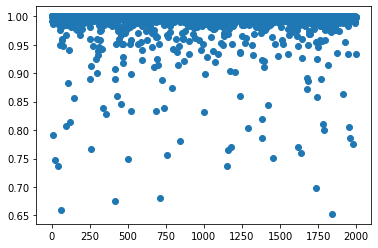

22
17
Accuracy:  0.906
No. of correct predictions:  1812


In [131]:
y_graph, y_pred_1 = convert(y_pred)

x_axis = range(len(X_test))

plt.scatter(x_axis, y_graph)
plt.show()

j=0
for i in y_graph:
  if i<0.8:
    j+=1

print(j)

j=0
k=0
for i in range(len(y_pred_1)):
  if y_pred_1[i]==y_test[i]:
    j+=1
  else:
    # print(i, ' -> ', y_pred[i])
    if y_graph[i]<0.8:
      k+=1

print(k)
print("Accuracy: ", j/len(y_test))
print("No. of correct predictions: ", j)

In [146]:
t = pd.DataFrame([input("Enter the text: ")])
t_ = use_vocab(t, v)

pred = model.predict(t_)
y1, y2 = convert(pred)
print("The mood is: ", le.inverse_transform(y2))

Enter the text: great movie
2
The mood is:  ['joy']
